In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d",	"price_change_percentage_14d",	"price_change_percentage_30d",	"price_change_percentage_60d",	"price_change_percentage_200d",	"price_change_percentage_1y"]])

In [6]:
#Display the first 3 rows of the scaled data
market_data_scaled[0:3]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051]])

In [7]:
# Create a DataFrame with the scaled data
market_df_scaled = pd.DataFrame(
    market_data_scaled,
    columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", 
             "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", 
             "price_change_percentage_1y"]
)

# Copy the crypto names from the original DataFrame
market_df_scaled["coin_id"] = df_market_data.index

# Set the coin_id column as index
market_df_scaled = market_df_scaled.set_index("coin_id")

# Display the scaled DataFrame
market_df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [9]:
# Create an empty list to store the inertia values

inertia_values = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
# Loop through each k value in k_values
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)

        # 2. Fit the model to the data using `market_data_scaled`
    kmeans_model.fit(market_data_scaled)

        # 3. Append the model's inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

    # Display the inertia values
inertia_values

c:\Users\cchea\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cchea\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cchea\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cchea\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

[287.0,
 198.57181809798124,
 145.63574772192865,
 79.02243535120977,
 66.21778006000339,
 59.13907002537008,
 48.40631449041362,
 38.9935879892797,
 34.40059545400234,
 28.573602560967853,
 23.89004435537795]

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_values
}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


In [11]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    xlabel="Number of Clusters (k)",
    ylabel="Inertia",
    title="Elbow Curve to Determine Optimal k",
    line_width=2,
    width=800,
    height=400
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  The best value for 'k' is 4 because it's where the inertia starts to decrease at a slower rate. It looks like the "elbow point".

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [12]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

In [13]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(market_data_scaled)

c:\Users\cchea\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [14]:
# Predict the clusters to group the cryptocurrencies
cluster_predictions = kmeans_model.predict(market_data_scaled)

# Add the cluster predictions to the scaled DataFrame
market_df_scaled['cluster'] = cluster_predictions

# Print the resulting array of cluster values
print(cluster_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [16]:
# Create a copy of the scaled DataFrame
market_df_scaled_copy = market_df_scaled.copy()

# Display the copied DataFrame
market_df_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [17]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
market_df_scaled_copy['cluster'] = cluster_predictions

# Display the copy of the scaled DataFrame
market_df_scaled_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [18]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
market_df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",  # Color by the cluster labels
    cmap='viridis',  # You can choose any color map here
    hover_cols=["coin_id"],  # Show cryptocurrency name on hover
    title="Cryptocurrency Clusters by Price Change",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
    width=800,
    height=400
)

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [20]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.

pca_result = pca_model.fit_transform(market_data_scaled)
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"])
# View the scaled PCA data
pca_df.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [21]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 0.895 or 89.5% of the variance in the original data.

This means that these three principal components capture 89.5% of the total variance in the dataset.

In [22]:
# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original scaled DataFrame
pca_df['coin_id'] = market_df_scaled_copy.index

# Set the coin_id column as index
pca_df = pca_df.set_index('coin_id')

# Display the scaled PCA DataFrame
pca_df.head()



,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [23]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

# Display the k-values list
k_values_pca

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [24]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:

for k in k_values_pca:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model_pca = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using the scaled PCA DataFrame
    kmeans_model_pca.fit(pca_df[["PC1", "PC2", "PC3"]])
    
    # 3. Append the model's inertia_ to the inertia list
    inertia_values_pca.append(kmeans_model_pca.inertia_)

# Display the inertia values
inertia_values_pca

c:\Users\cchea\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cchea\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cchea\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cchea\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

[256.87408556789256,
 168.81189630685225,
 115.91807663320064,
 49.66549665179736,
 41.35731380312856,
 30.796641787041597,
 25.91545691045614,
 21.89093627463323,
 17.720698854473667,
 13.83869870886457,
 7.984354811896221]

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values_pca,  # The k-values
    "inertia": inertia_values_pca  # The corresponding inertia values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)
# Display the DataFrame
df_elbow_pca.head()

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


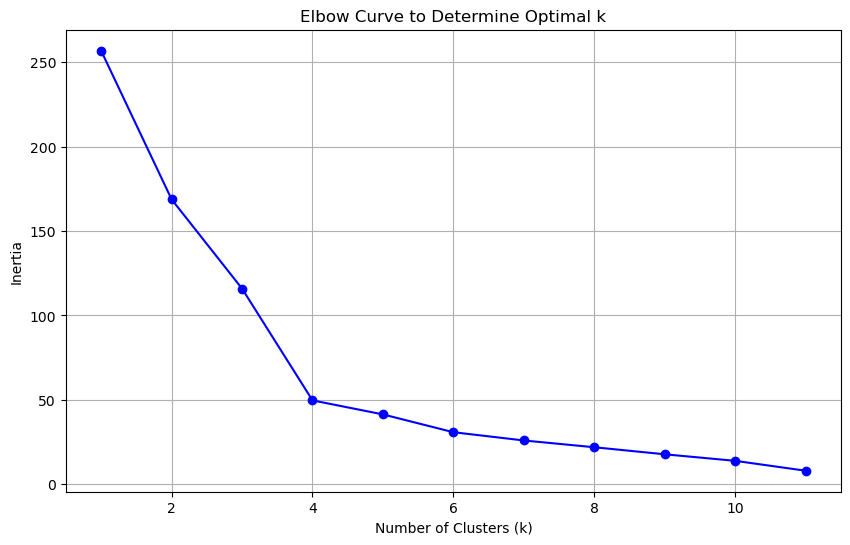

In [27]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot the Elbow curve using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k")
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data is 4. This is based on the analysis of the Elbow Curve, where the inertia starts to level off after k=4, suggesting that 4 clusters is the optimal choice.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, the best k-value for the PCA data is 4, which differs from the best k-value found using the original data. PCA reduces the dimensionality, leading to a different clustering result. 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [37]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=1)

In [42]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(market_df_scaled_copy)

c:\Users\cchea\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [45]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters = kmeans_pca.predict(market_df_scaled_copy)

# Rename the columns to match the expected plot labels
pca_df.columns = ["PC1", "PC2", "PC3"]

In [46]:
# Create a copy of the scaled PCA DataFrame
pca_df_copy = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_copy["Cluster"] = kmeans_pca.labels_

# Display the copy of the scaled PCA DataFrame
pca_df_copy.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [47]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_df_copy.hvplot.scatter(
    x="PC1",  # Use the first principal component on the x-axis
    y="PC2",  # Use the second principal component on the y-axis
    c="Cluster",  # Color the points by cluster labels
    cmap='viridis',  # You can choose any color map here
    hover_cols=["coin_id"],  # Show cryptocurrency name on hover
    title="Cryptocurrency Clusters by PCA Components",
    xlabel="PC1 (First Principal Component)",
    ylabel="PC2 (Second Principal Component)",
    width=800,
    height=400
)

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [61]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

In [62]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 